In [1]:
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 2020 US Presidential Candidate Donald Trump Twitter Sentiment Analysis

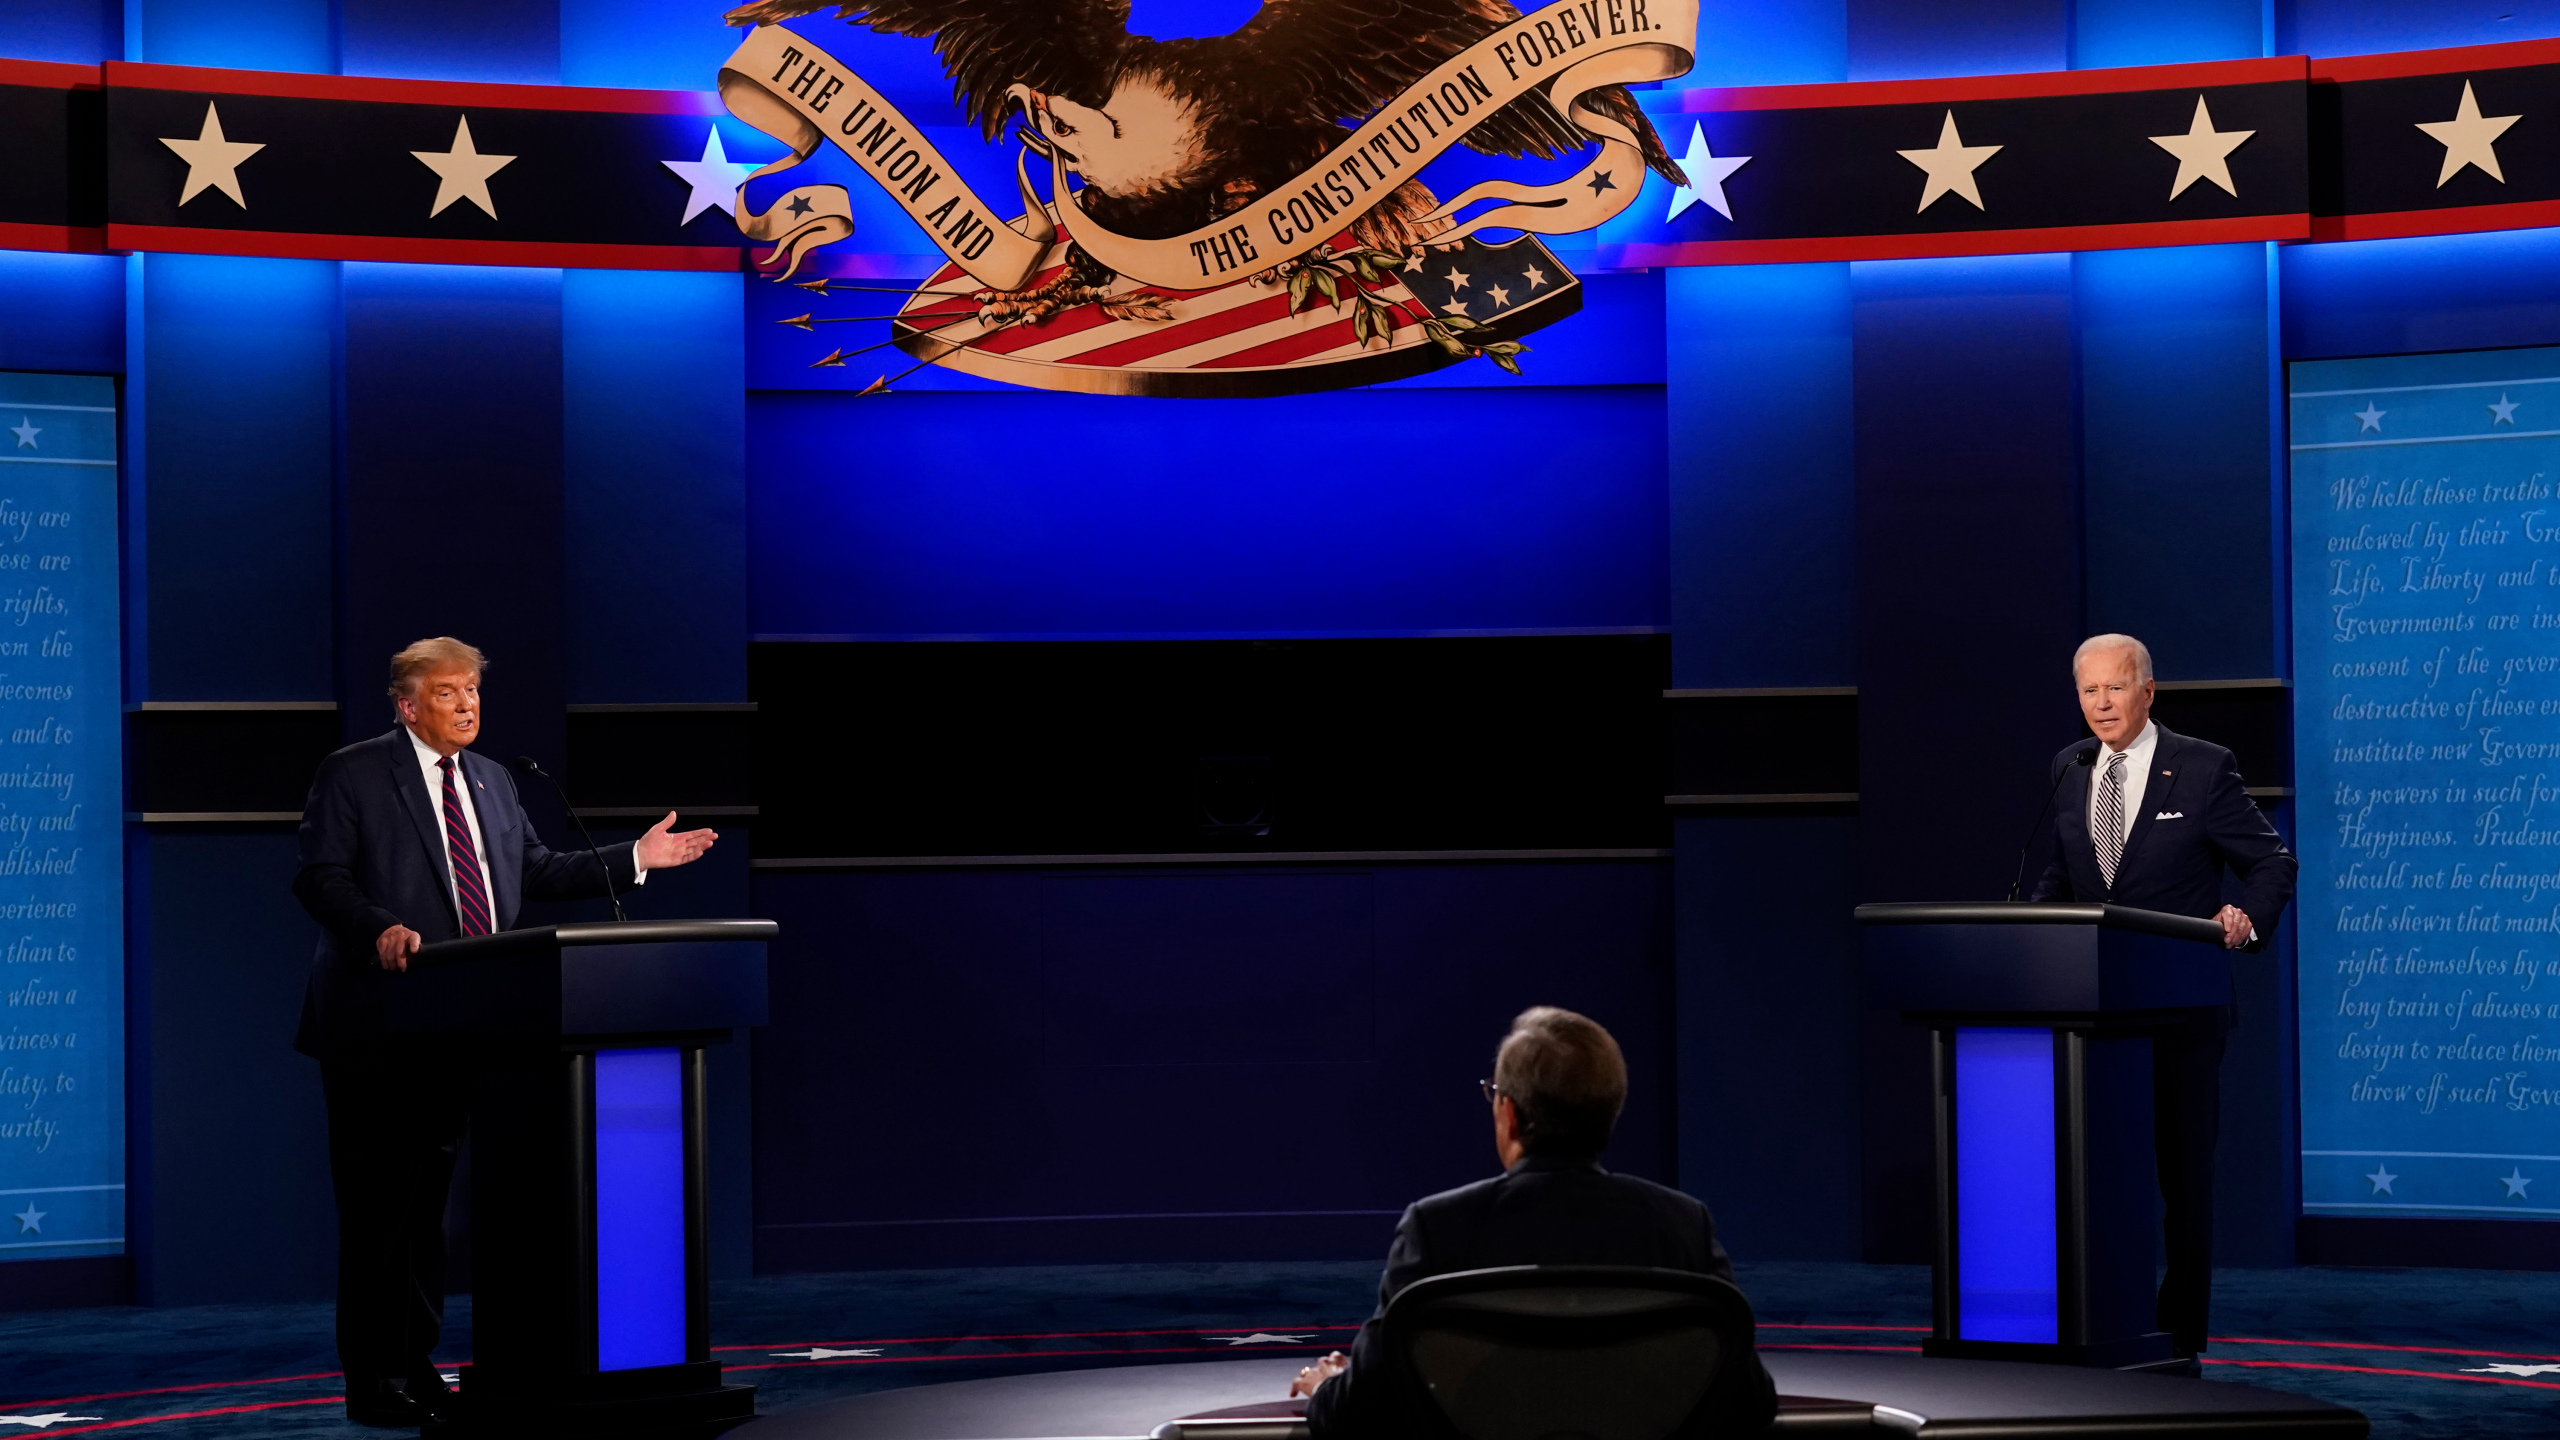

In [2]:
from IPython.display import Image
Image(filename='Election6.jpg')

In [2]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from nltk.stem import WordNetLemmatizer

In [3]:
dfs = pd.read_csv('DonaldTrumpTweets.csv')

# Tweets Dataset

In [4]:
dfs.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
0,"RT @mattdizwhitlock: 🔥🔥🔥\n\n""Ossoff is a baby-...",[],2515,23,-0.4404,Negative
1,RT @Jim_Jordan: Durham confirms what we alread...,[],11274,17,0.0000,Neutral
2,RT @jacobkschneider: That's our President @rea...,[],2842,8,0.0000,Neutral
3,RT @TeamTrump: President @realDonaldTrump: We ...,[],3704,11,0.8452,Positive
4,RT @TeamTrump: President @realDonaldTrump: Vac...,[],2266,13,0.0000,Neutral


In [5]:
dfs.shape

(3235, 6)

In [6]:
dfs.isnull().sum()

Tweets            0
Hashtags          0
Retweets          0
word_count        0
Compound Score    0
Sentiment         0
dtype: int64

In [7]:
dfs.columns

Index(['Tweets', 'Hashtags', 'Retweets', 'word_count', 'Compound Score',
       'Sentiment'],
      dtype='object')

# Tweets Word Count Distribution

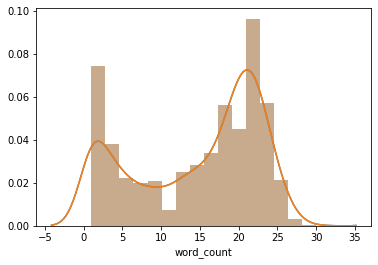

In [8]:
# Word Count Distribution Histogram
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("DT_word_count.png")
sns.distplot(dfs['word_count'])

# Sentiment Distribution of the Tweets

In [9]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

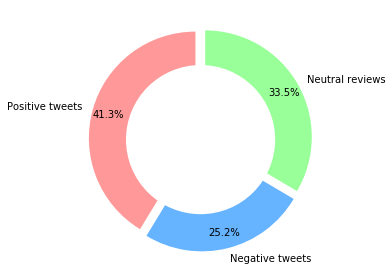

In [10]:
# Sentiment Distribution

pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive tweets', 'Negative tweets', 'Neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('DT_sentiment_distribution.png')

plt.show()

# Most Positive Tweet

In [11]:
# Most Positive Tweet

pos_max = dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])]
pos_max

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1918,This election is a simple choice: If Biden Win...,[],17477,22,0.9689,Positive


# Most Negative Tweet

In [12]:
# Most Negative Tweet

neg_max = dfs.loc[dfs['Compound Score']==min(dfs['Compound Score'])]
neg_max

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1924,Totally Negative China Virus Reports. Hit it e...,[],28971,21,-0.9658,Negative


# Positive Tweets

In [13]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
3,RT @TeamTrump: President @realDonaldTrump: We ...,[],3704,11,0.8452,Positive
5,RT @TeamTrump: President @realDonaldTrump: We ...,[],2578,16,0.7506,Positive
6,RT @TeamTrump: President @realDonaldTrump: We ...,[],3724,15,0.3818,Positive
12,RT @TeamTrump: President @realDonaldTrump: Sen...,[],2092,17,0.6361,Positive
17,Thank you Matt! https://t.co/yPqsdzytu4,[],3591,4,0.4199,Positive


In [14]:
positive_tweets.shape

(1336, 6)

# Negative Tweets

In [15]:
# Negative Tweets

negative_tweets = gp.get_group('Negative')
negative_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
0,"RT @mattdizwhitlock: 🔥🔥🔥\n\n""Ossoff is a baby-...",[],2515,23,-0.4404,Negative
9,RT @TeamTrump: President @realDonaldTrump: On ...,[],2239,20,-0.4588,Negative
10,RT @TeamTrump: President @realDonaldTrump: Rap...,[],2231,18,-0.1027,Negative
11,RT @TeamTrump: President @realDonaldTrump: Jon...,[],2072,13,-0.4404,Negative
14,RT @TeamTrump: President @realDonaldTrump: Rad...,[],2990,16,-0.5423,Negative


In [16]:
negative_tweets.shape

(816, 6)

# Neutral Tweets

In [17]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1,RT @Jim_Jordan: Durham confirms what we alread...,[],11274,17,0.0,Neutral
2,RT @jacobkschneider: That's our President @rea...,[],2842,8,0.0,Neutral
4,RT @TeamTrump: President @realDonaldTrump: Vac...,[],2266,13,0.0,Neutral
7,RT @TeamTrump: President @realDonaldTrump: “If...,[],3217,15,0.0,Neutral
8,RT @TeamTrump: President @realDonaldTrump in #...,"['Georgia', 'HoldTheLine']",2423,17,0.0,Neutral


In [18]:
neutral_tweets.shape

(1083, 6)

# Wordcloud Function

In [19]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['teamtrump','realdonaldtrump']
stopwords.extend(newStopWords)

In [21]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        
        
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords]
        
        for word in tokens[:]: 
            if word.startswith('@'): 
                tokens.remove(word) 
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

In [22]:
import cv2
import numpy as np
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

# WordCloud - Positive Tweets

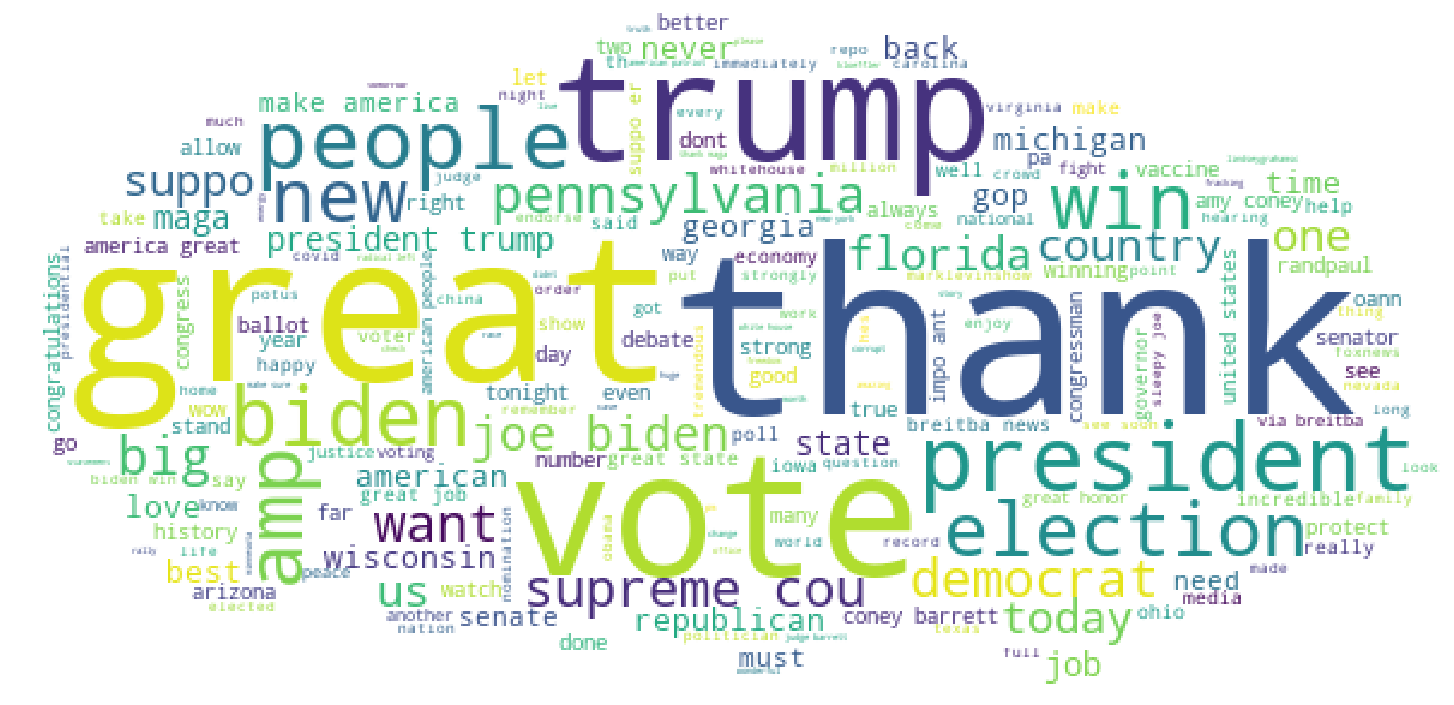

In [23]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('DT_positive_tweets_wc.png')


# WordCloud - Negative Tweets

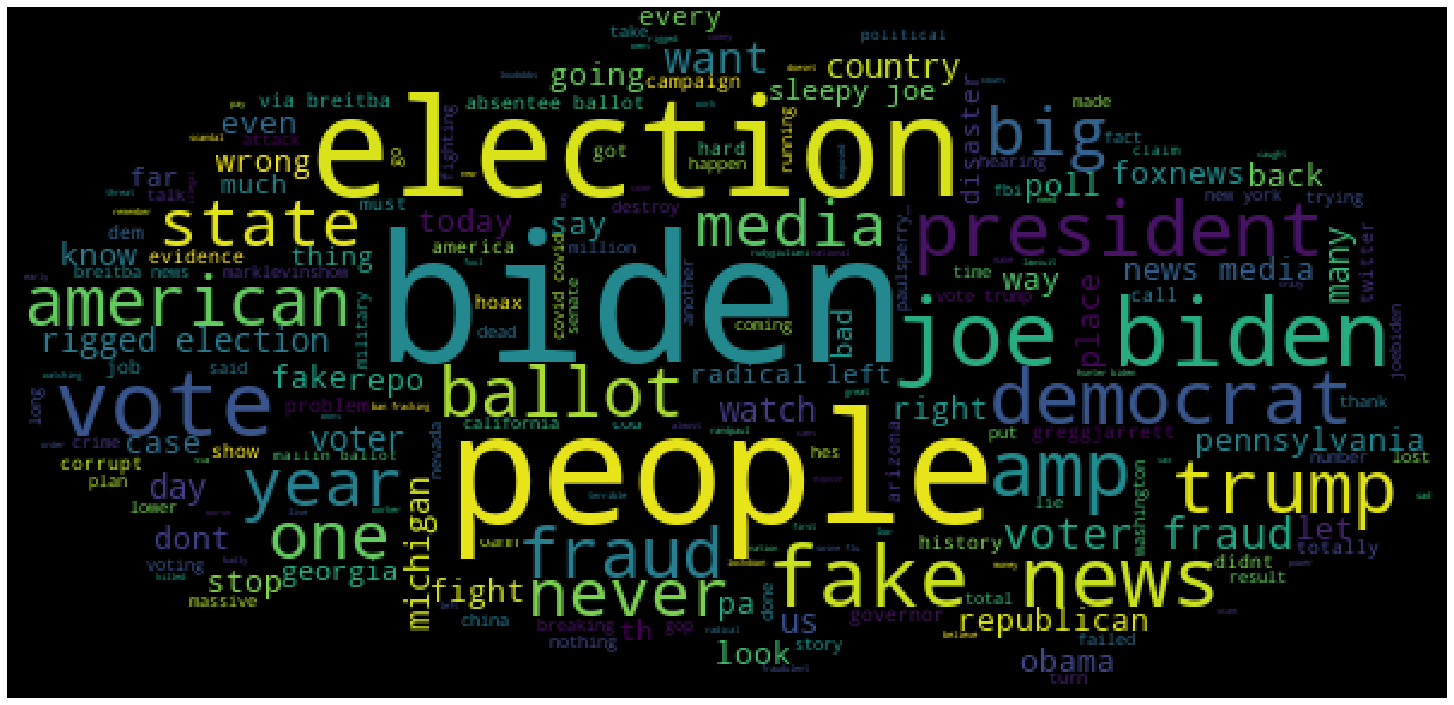

In [24]:
# WordCloud - Negative Tweets

negative_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(negative_tweets)[0])

plot_Cloud(negative_wordcloud)
negative_wordcloud.to_file('DT_negative_tweets_wc.png')


# Wordcloud - Neutral Tweets 

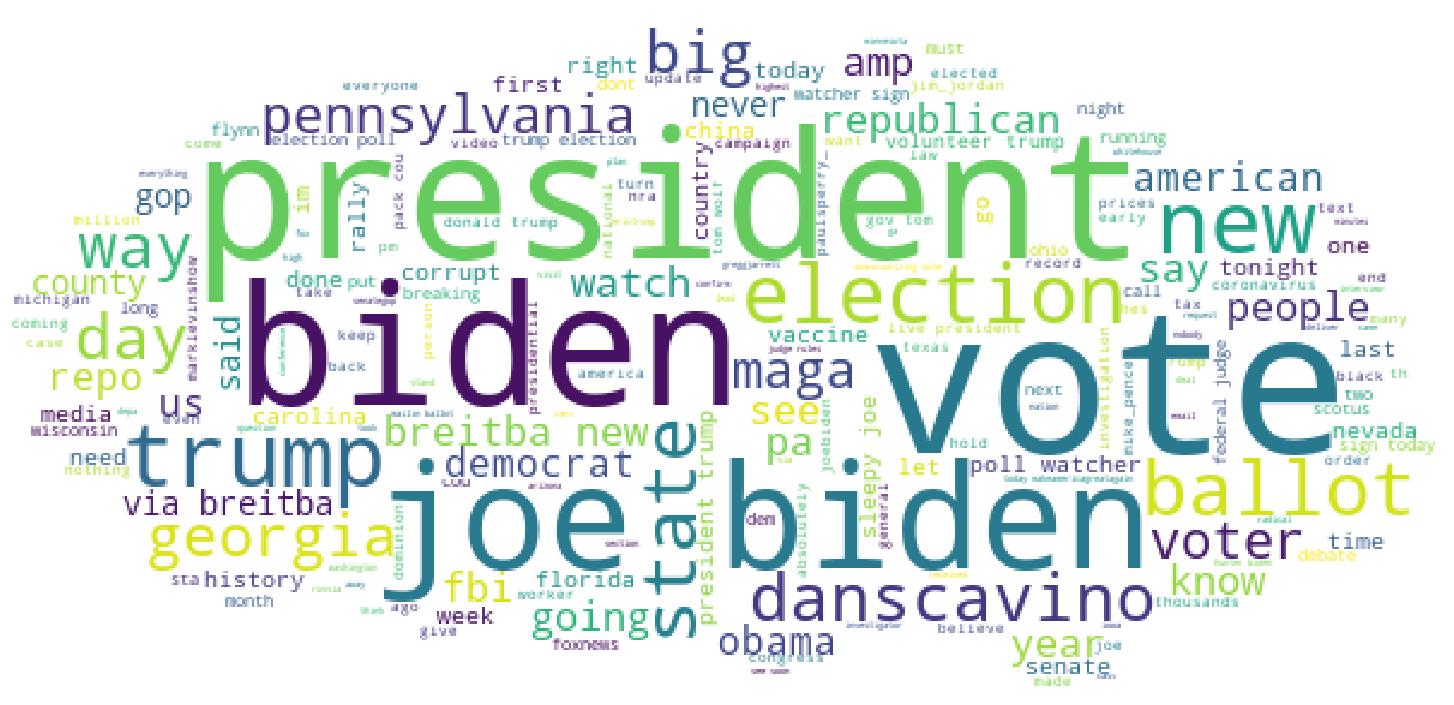

In [25]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('DT_neutral_tweets_wc.png')


# Wordcloud - All Tweets

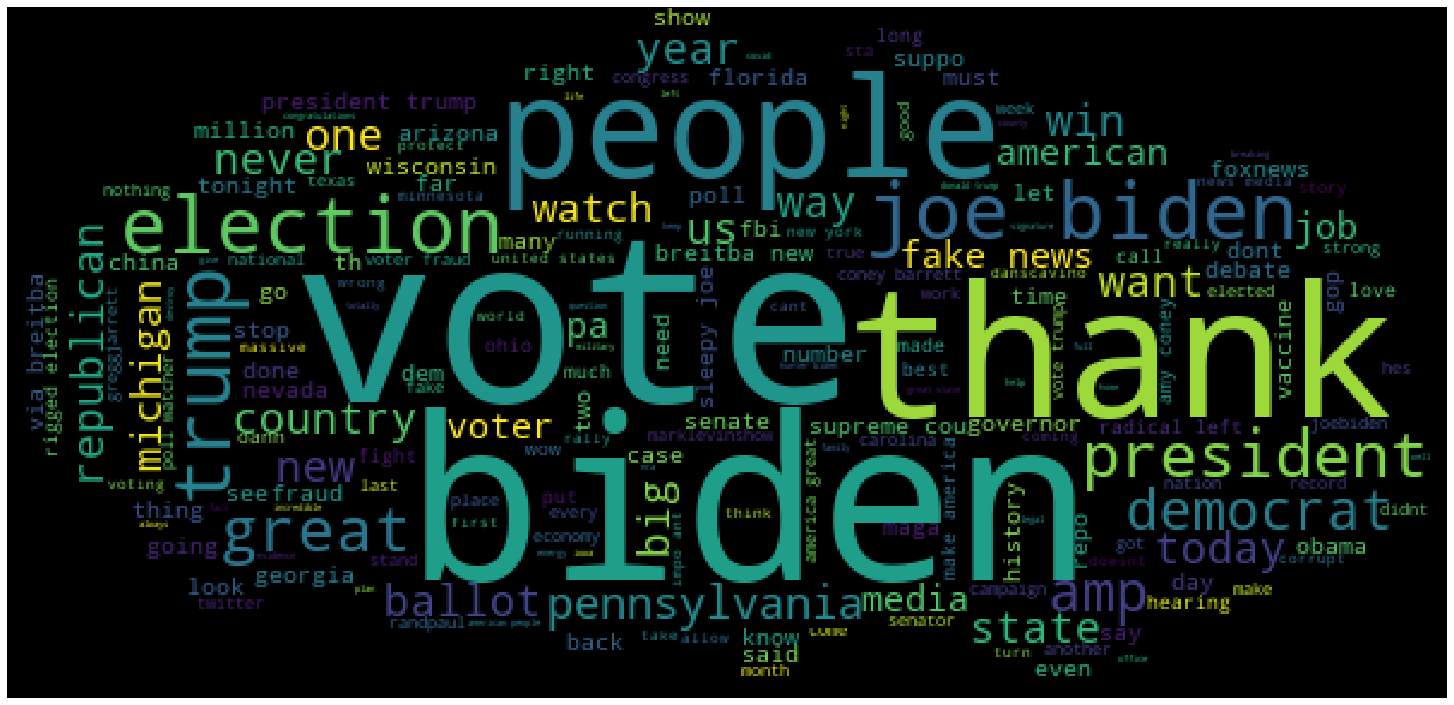

In [26]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)
total_wordcloud.to_file('DT_total_tweets_wc.png')


# Most Frequent Words used in all the Tweets

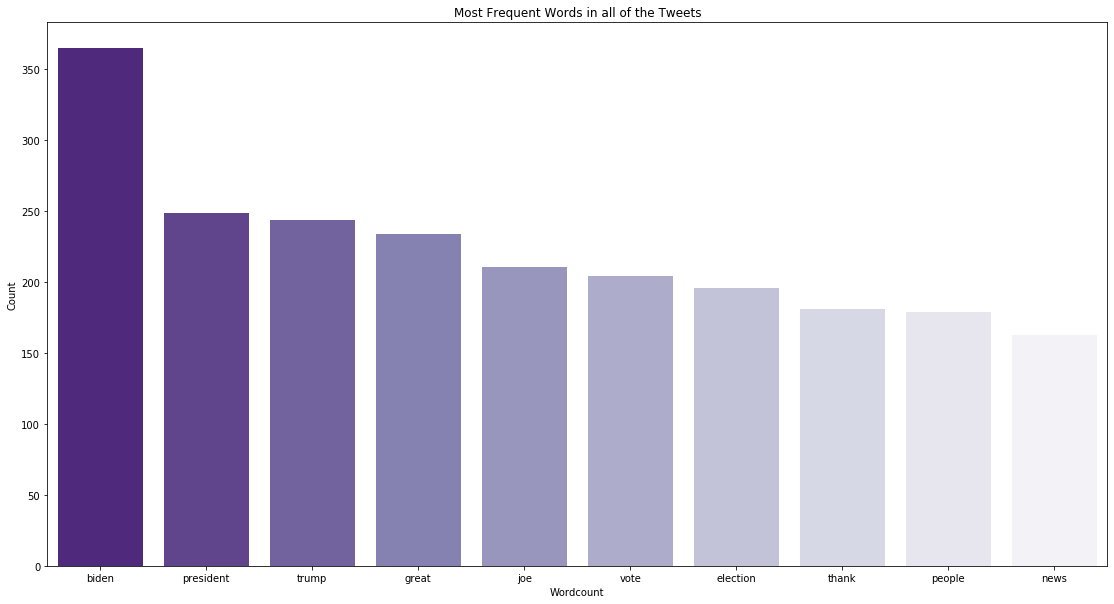

In [27]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd,palette="Purples_r", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("DT_total_tweets_wf.png")
plt.show()

# Most Frequent Words used in the Positive Tweets

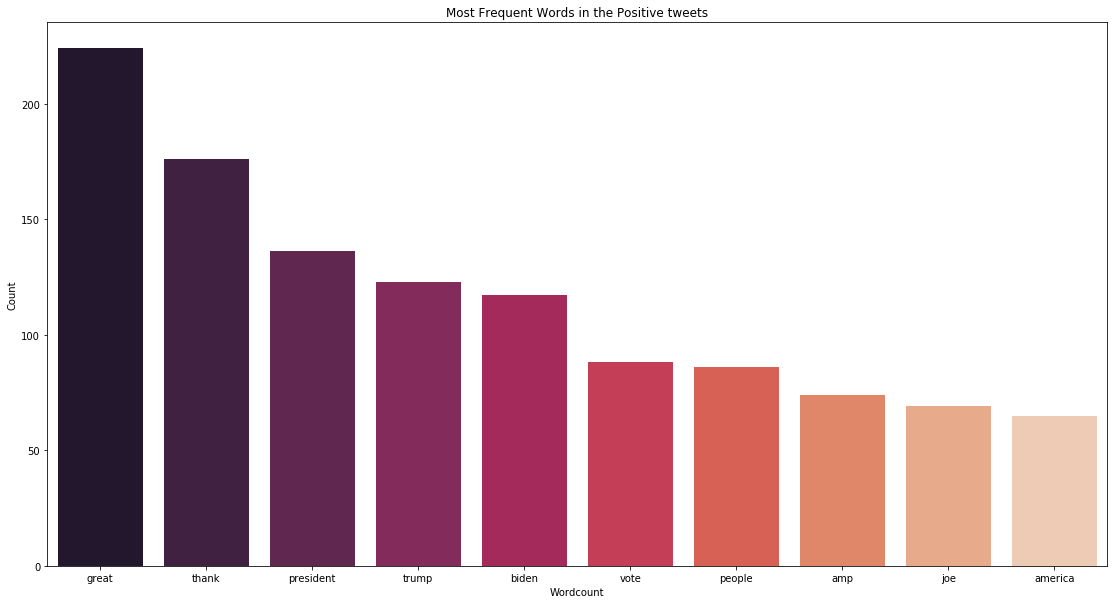

In [28]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp, palette="rocket",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("DT_positive_tweets_wf.png")
plt.show()

# Most Frequent Words used in the Negative Tweets

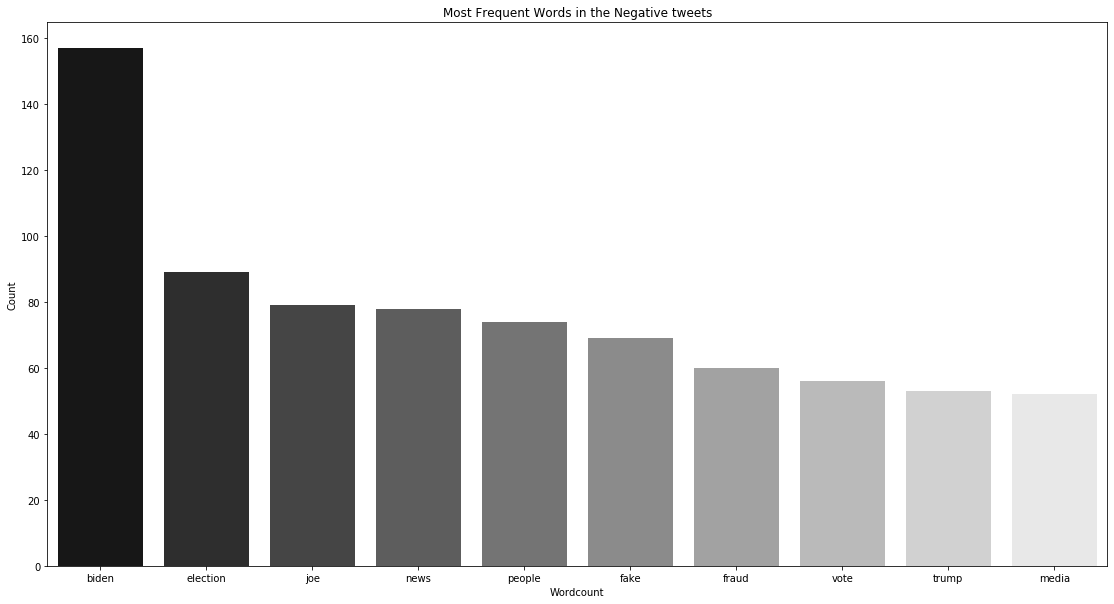

In [29]:
# Most Frequent Words - Negative Tweets

an = nltk.FreqDist(wordcloud(negative_tweets)[1])
dn = pd.DataFrame({'Wordcount': list(an.keys()),
                  'Count': list(an.values())})
# selecting top 10 most frequent hashtags     
dn = dn.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Negative tweets')
ax = sns.barplot(data=dn,palette="gray", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("DT_negative_tweets_wf.png")
plt.show()

# Most Frequent Words used in the Neutral Tweets

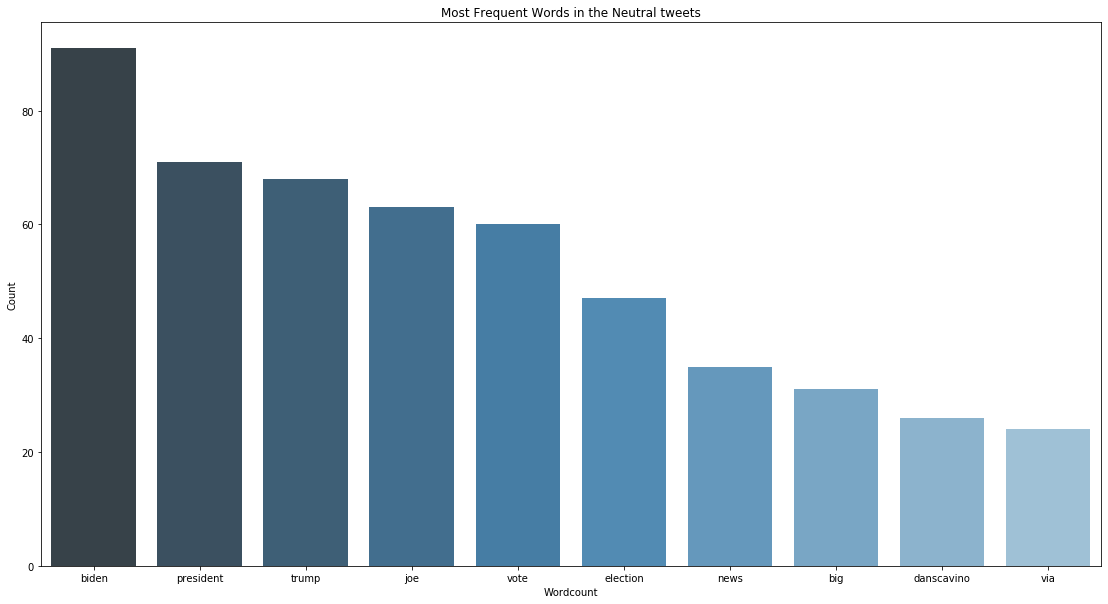

In [30]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du,palette= "Blues_d", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("DT_neutral_tweets_wf.png")
plt.show()